<a href="https://colab.research.google.com/github/alvaro-barrera/phishing-detection-url/blob/main/project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CONEXIÓN A DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#INGRESANDO A CARPETA CONTENEDORA DE ARCHIVOS EN DRIVE "ml_database"
%cd '/content/drive/My Drive/Colab Notebooks/db'

/content/drive/My Drive/Colab Notebooks/db


In [ ]:
#IMPORTACIÓN DE LIBRERÍAS
import pandas as pd #IMPORTACIÓN DE LIBRERIA - PANDAS
import numpy as np

from sklearn.preprocessing import MinMaxScaler #POR DEFECTO USA VALORES ENTRE 0-1

import seaborn as sn #IMPORTACIÓN DE LIBRERIA - SEABORN
import matplotlib.pyplot as plt #IMPORTACIÓN DE LIBRERIA - MATPLOT

%matplotlib inline

# Conjuntos de datos para la detección de sitios web de phishing


## Breve descripción del conjunto de datos:

> Número total de instancias: 58,645

> Número de instancias de sitios web legítimos (etiquetadas como 0): 27.998

> Número de instancias de sitios web de phishing (etiquetadas como 1): 30,647

In [ ]:
#CARGA DE ARCHIVO .CSV 
dataset = pd.read_csv('dataset_small.csv',
                      sep=',', #DEFINIENDO SEPARADOR ',' PROPIO DE .CSV
                      encoding='utf-8', #CODIFICACIÓN UTF-8
                      na_values=' ')

In [ ]:
dataset.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [ ]:
dataset.groupby('phishing').size()

phishing
0    27998
1    30647
dtype: int64

In [ ]:
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,...,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.830898,-0.860670,-0.587723,-0.846193,-0.680791,-0.872692,-0.873323,-0.873357,-0.871242,-0.870969,-0.873305,-0.873442,-0.872862,-0.791559,8.482462,-0.836354,-0.636832,0.027709,0.776379,-0.030147,33140.826447,2531.939483,293.615074,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,0.096013,0.093381,0.136331,0.370849,0.075802,0.122604,2.115804,0.305755,54.712657,0.790989,0.465673,0.019802,0.0,0.0,0.0,0.004129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.714293,7.244541,0.058444,0.059307,...,0.457615,0.457615,1.713954,16.358671,1.193137,0.771199,0.797698,0.663899,0.386856,1.345035,0.432952,1.235146,0.339404,0.333280,0.332832,0.347086,0.347966,0.333350,0.332480,0.336390,1.285886,42.598270,0.459396,1.137735,0.164139,1.572495,0.591021,50339.910407,2799.792419,562.400108,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.000000,0.000000,0.000000,...,-1.000000,-1.00000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


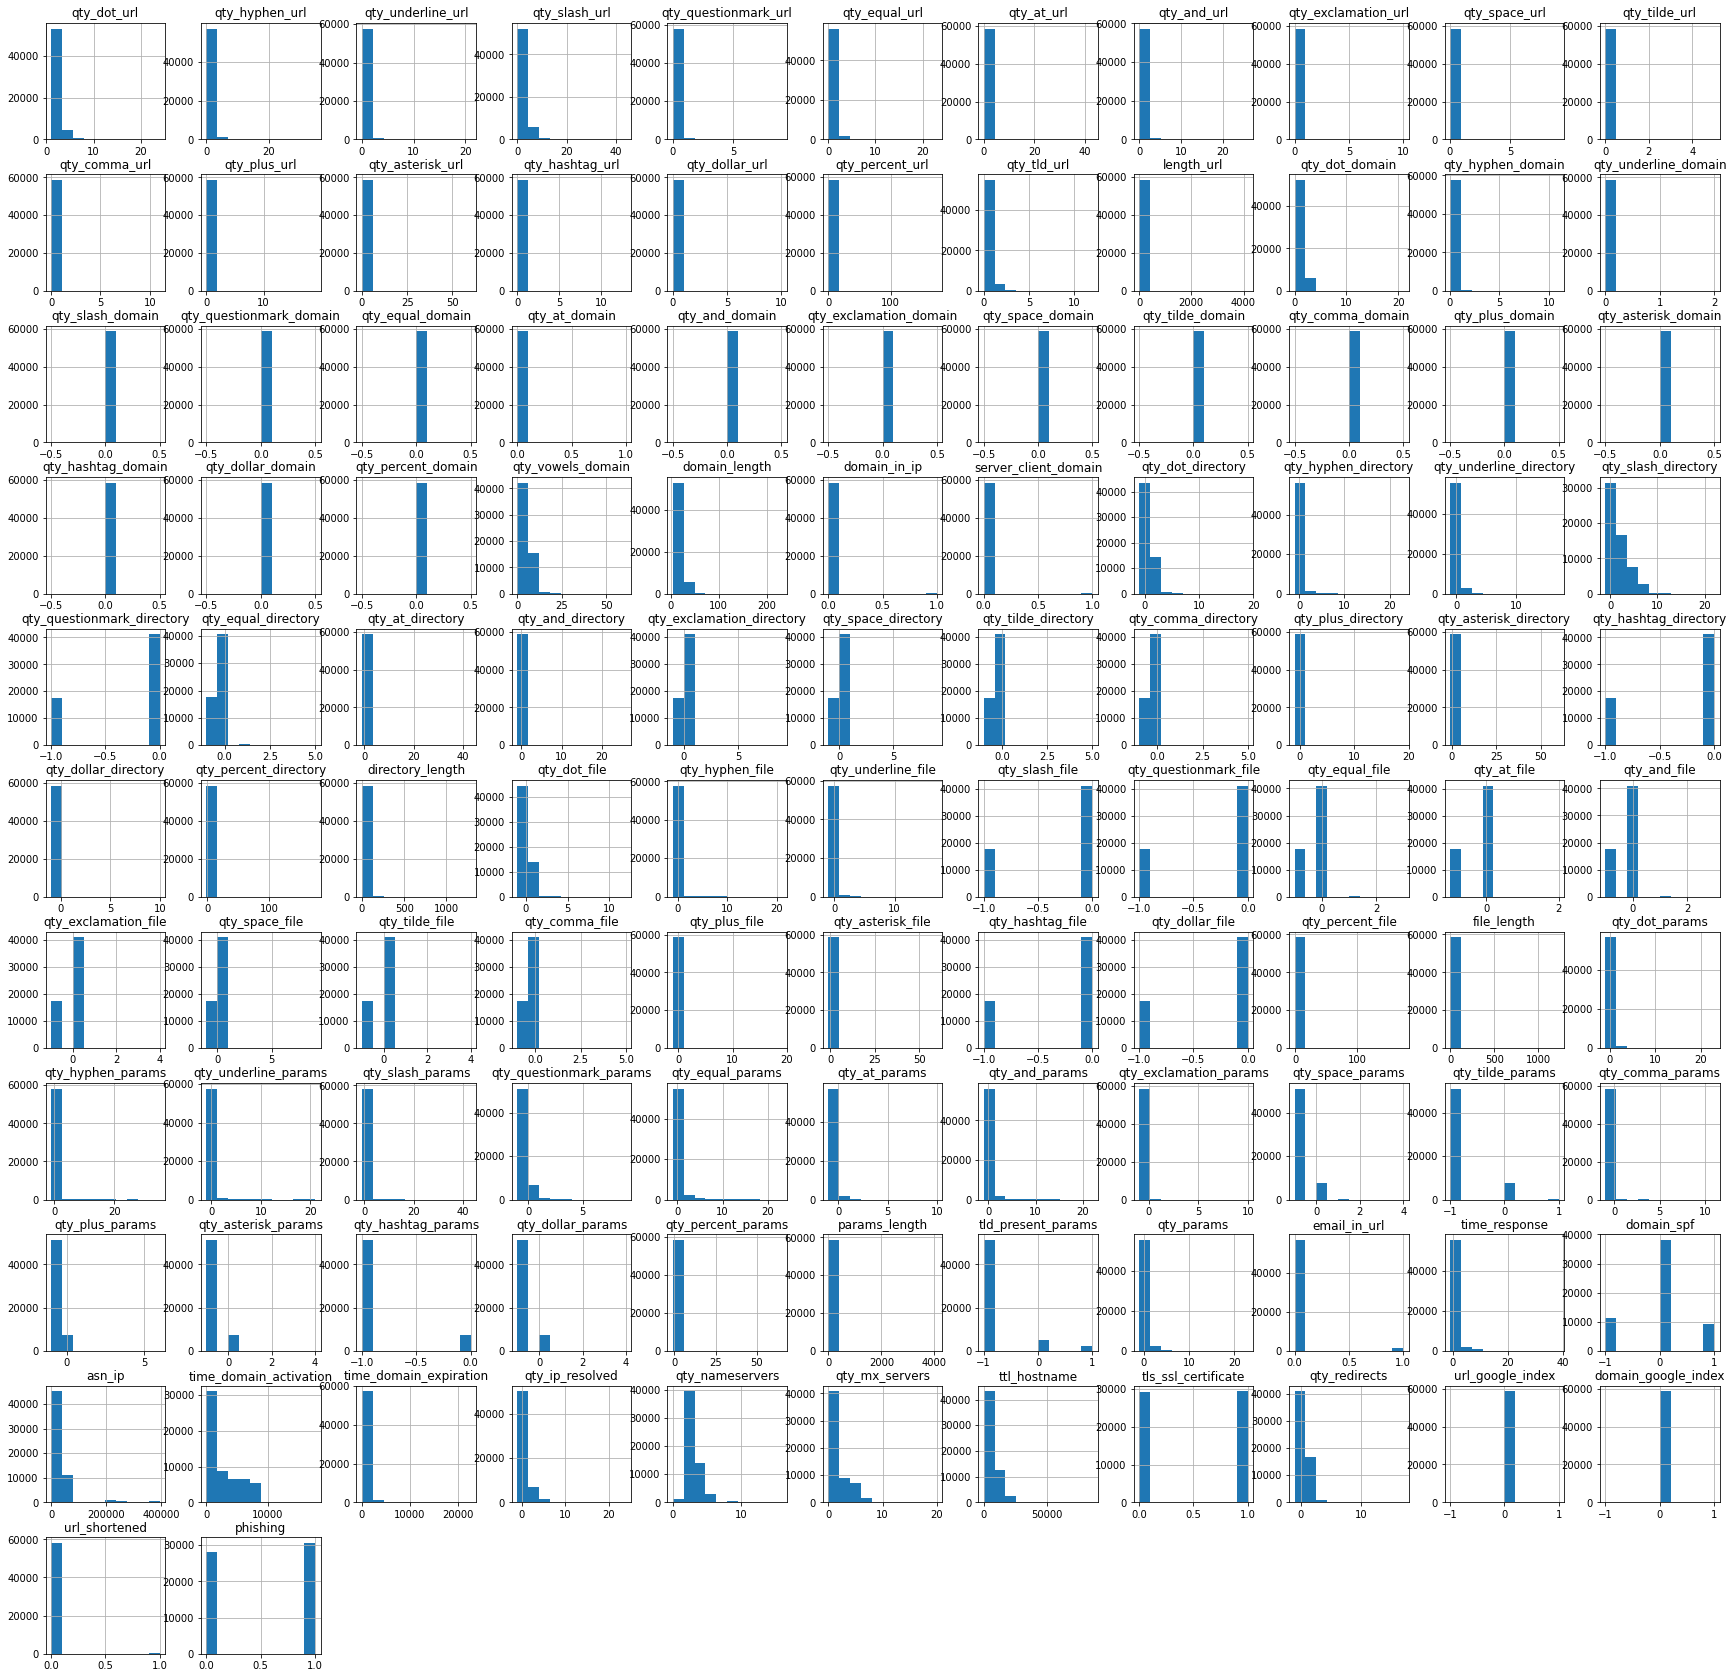

In [ ]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()


# VISUALIZACIÓN DE DATOS ESTADÍSTICOS
Variable objetivo: "phishing"

## Descripción de los atributos del dataset

|          Feature           |                   Description                      |
|----------------------------|----------------------------------------------------|
| qty_dot_url                | contador de (.) en URL                                   |
| qty_hyphen_url             | contador de (-) en URL                                   |
| qty_underline_url          | contador de (_) en URL                                   |
| qty_slash_url              | contador de (/) en URL                                   |
| qty_questionmark_url       | contador de (?) en URL                                   |
| qty_equal_url              | contador de (=) en URL                                   |
| qty_at_url                 | contador de (@) en URL                                   |
| qty_and_url                | contador de (&) en URL                                   |
| qty_exclamation_url        | contador de (!) en URL                                   |
| qty_space_url	             | contador de ( ) en URL                                   |
| qty_tilde_url	             | contador de (~) en URL                                   |
| qty_comma_url	             | contador de (,) en URL                                   |
| qty_plus_url	             | contador de (+) en URL                                   |
| qty_asterisk_url	         | contador de (*) en URL                                   |
| qty_hashtag_url	         | contador de (#) en URL                                   |
| qty_dollar_url	         | contador de (símbolo de dólar) en URL                                   |
| qty_percent_url	         | contador de (%) en URL                                   |
| qty_tld_url	             | top-level-domain length                            |
| length_url	             | URL length                                         |
| qty_dot_domain	         | contador de (.) en el dominio                                |
| qty_hyphen_domain	         | contador de (-) en el dominio                                |
| qty_underline_domain       | contador de (_) en el dominio                                |
| qty_slash_domain	         | contador de (/) en el dominio                                |
| qty_questionmark_domain    | contador de (?) en el dominio                                |
| qty_equal_domain           | contador de (=) en el dominio                                |
| qty_at_domain              | contador de (@) en el dominio                                |
| qty_and_domain             | contador de (&) en el dominio                                |
| qty_exclamation_domain     | contador de (!) en el dominio                                |
| qty_space_domain           | contador de ( ) en el dominio                                |
| qty_tilde_domain           | contador de (~) en el dominio                                |
| qty_comma_domain           | contador de (,) en el dominio                                |
| qty_plus_domain            | contador de (+) en el dominio                                |
| qty_asterisk_domain        | contador de (*) en el dominio                                |
| qty_hashtag_domain         | contador de (#) en el dominio                                |
| qty_dollar_domain          | contador de (símbolo de dólar) en el dominio                                |
| qty_percent_domain         | contador de (%) en el dominio                                |
| qty_vowels_domain          | count vowels en el dominio                             |
| domain_length              | domain length                                      |
| domain_in_ip               | Dominio de URL en formato de dirección IP                    |
| server_client_domain       | el dominio contiene las palabras clave "server" o "client"  |
| qty_dot_directory	         | contador de (.) en directorio                             |
| qty_hyphen_directory       | contador de (-) en directorio                             |
| qty_underline_directory    | contador de (_) en directorio                             |
| qty_slash_directory        | contador de (/) en directorio                             |
| qty_questionmark_directory | contador de (?) en directorio                             |
| qty_equal_directory        | contador de (=) en directorio                             |
| qty_at_directory           | contador de (@) en directorio                             |
| qty_and_directory          | contador de (&) en directorio                             |
| qty_exclamation_directory	 | contador de (!) en directorio                             |
| qty_space_directory        | contador de ( ) en directorio                             |
| qty_tilde_directory        | contador de (~) en directorio                             |
| qty_comma_directory        | contador de (,) en directorio                             |
| qty_plus_directory         | contador de (+) en directorio                             |
| qty_asterisk_directory     | contador de (*) en directorio                             |
| qty_hashtag_directory      | contador de (#) en directorio                             |
| qty_dollar_directory       | contador de (símbolo de dólar) en directorio                             |
| qty_percent_directory      | contador de (%) en directorio                             |
| directory_length           | directory length                                   |
| qty_dot_file               | contador de (.) en archivo                                  |
| qty_hyphen_file            | contador de (-) en archivo                                  |
| qty_underline_file         | contador de (_) en archivo                                  |
| qty_slash_file             | contador de (/) en archivo                                  |
| qty_questionmark_file      | contador de (?) en archivo                                  |
| qty_equal_file             | contador de (=) en archivo                                  |
| qty_at_file                | contador de (@) en archivo                                  |
| qty_and_file               | contador de (&) en archivo                                  |
| qty_exclamation_file       | contador de (!) en archivo                                  |
| qty_space_file             | contador de ( ) en archivo                                  |
| qty_tilde_file             | contador de (~) en archivo                                  |
| qty_comma_file             | contador de (,) en archivo                                  |
| qty_plus_file	             | contador de (+) en archivo                                  |
| qty_asterisk_file          | contador de (*) en archivo                                  |
| qty_hashtag_file           | contador de (#) en archivo                                  |
| qty_dollar_file            | contador de (símbolo de dólar) en archivo                                  |
| qty_percent_file           | contador de (%) en archivo                                  |
| file_length                | longitud de archivo                                        |
| qty_dot_params             | contador de (.) en parámetros                            |
| qty_hyphen_params          | contador de (-) en parámetros                            |
| qty_underline_params       | contador de (_) en parámetros                            |
| qty_slash_params           | contador de (/) en parámetros                            |
| qty_questionmark_params    | contador de (?) en parámetros                            |
| qty_equal_params           | contador de (=) en parámetros                            |
| qty_at_params              | contador de (@) en parámetros                            |
| qty_and_params             | contador de (&) en parámetros                            |
| qty_exclamation_params     | contador de (!) en parámetros                            |
| qty_space_params           | contador de ( ) en parámetros                            |
| qty_tilde_params           | contador de (~) en parámetros                            |
| qty_comma_params           | contador de (,) en parámetros                            |
| qty_plus_params            | contador de (+) en parámetros                            |
| qty_asterisk_params        | contador de (*) en parámetros                            |
| qty_hashtag_params         | contador de (#) en parámetros                            |
| qty_dollar_params          | contador de (símbolo de dólar) en parámetros                            |
| qty_percent_params         | contador de (%) en parámetros                            |
| params_length              | longitud de parametros                                  |
| tld_present_params         | presencia de TLD dentro de los argumentos                          |
| qty_params                 | número de parametros                               |
| email_in_url               | email presente en URL                               |
| time_response              | tiempo de busqueda (respuesta) domain (lookup)             |
| domain_spf                 | domonio posee SPF                                     |
| asn_ip                     | Numero AS (o ASN)                                 |
| time_domain_activation     | tiempo (en días) de activacion de dominio                |
| time_domain_expiration     | tiempo (en días) de expiracion de dominio                |
| qty_ip_resolved            | IPs resueltas                            |
| qty_nameservers            | number of resolved name servers (NameServers - NS) |
| qty_mx_servers             | Servidores MX                               |
| ttl_hostname               | time-to-live (TTL) associado con el hostname  |
| tls_ssl_certificate        | Certificado TLS / SSL valido                        |
| qty_redirects              | numero de redirecciones                               |
| url_google_index           | checkeo si URL está indexada en Google                  |
| domain_google_index        | checkeo si dominio está indexado en Google               |
| url_shortened              | checkeo si URL está acortado                          |
                            |

In [ ]:
#VISUALIZACIÓN DE DATOS ESTADÍSTICOS DEL DATAFRAME
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,...,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.830898,-0.860670,-0.587723,-0.846193,-0.680791,-0.872692,-0.873323,-0.873357,-0.871242,-0.870969,-0.873305,-0.873442,-0.872862,-0.791559,8.482462,-0.836354,-0.636832,0.027709,0.776379,-0.030147,33140.826447,2531.939483,293.615074,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,0.096013,0.093381,0.136331,0.370849,0.075802,0.122604,2.115804,0.305755,54.712657,0.790989,0.465673,0.019802,0.0,0.0,0.0,0.004129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.714293,7.244541,0.058444,0.059307,...,0.457615,0.457615,1.713954,16.358671,1.193137,0.771199,0.797698,0.663899,0.386856,1.345035,0.432952,1.235146,0.339404,0.333280,0.332832,0.347086,0.347966,0.333350,0.332480,0.336390,1.285886,42.598270,0.459396,1.137735,0.164139,1.572495,0.591021,50339.910407,2799.792419,562.400108,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.000000,0.000000,0.000000,...,-1.000000,-1.00000

Verficamos la cantidad de datos null por columna.

In [ ]:
dataset.count() #Conteo de valores

qty_dot_url             58645
qty_hyphen_url          58645
qty_underline_url       58645
qty_slash_url           58645
qty_questionmark_url    58645
                        ...  
qty_redirects           58645
url_google_index        58645
domain_google_index     58645
url_shortened           58645
phishing                58645
Length: 112, dtype: int64

In [ ]:
  dataset.isnull().sum(axis=0) # Encontrar valores vacíos

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

# BALANCEO DE DATOS


In [ ]:
target_count = dataset['phishing'].value_counts() #CONTEO DE SUBSCRIPTION_FLAG 0 | 1
count_no_phishing = target_count[0] #CANTIDAD DE "NO PHISHING"
count_phishing = target_count[1] #CANTIDAD DE "PHISHING"

count_phishing,count_no_phishing #VISUALIZANDO CANTIDADES

(30647, 27998)

In [ ]:
#SEPARAR EN DOS DATAFRAMES EL DATASET 
dataset_no_phishing = dataset[dataset['phishing'] == 0]
dataset_phishing = dataset[dataset['phishing'] == 1]

*Sampling* aleatorio de los datos, de manera que se tenga la misma cantidad de "phishing" y "no phishing".

In [ ]:
#APLICANDO SOBRE-MUESTREO A LOS DATOS
dataset_phishing_over = dataset_phishing.sample(count_no_phishing, replace=True) #NUEVO DATAFRAME DE "PHISHING" BASADO EN UNA MUESTRA DEL DATAFRAME DE "PHISHING" DEL TAMAÑO DE LOS "NO PHISHING"

df_test_over = pd.concat([dataset_no_phishing, dataset_phishing_over], axis=0) #CONCATENANDO EL DATAFRAME "NO PHISHING" CON EL NUEVO DATAFRAME "PHISHING" DEL SOBREMUESTREO

In [ ]:
df_test_over.groupby('phishing').size() #EL TAMAÑO DEL DATASET QUEDA BALANCEADO AL NÚMERO DE "NO PHISHING"

phishing
0    27998
1    27998
dtype: int64

# DATOS DE ENTRENAMIENTO Y TESTING
- Subdivisiones del dataset balanceado: Conjunto de entrenamiento (train) y conjunto de pruebas (test).
- Para entrenar nuestro modelo de Machine Learning y poder saber si está funcionando bien.


In [ ]:
from sklearn.model_selection import train_test_split 
columns = dataset.columns.tolist() #COLUMNAS DE DATASET CONVERTIDAS EN UNA LISTA
columns = [x for x in columns if x not in ["phishing"]]  #DEFINIENDO UNA LIST COMPREHENSION

X = df_test_over[columns] #VARIABLES REGRESORAS
Y = pd.DataFrame(df_test_over['phishing'])

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=.2, #PORCENTAJE PARA TESTING
                                                    random_state=22) #FIJAR SEMILLA PARA OBTENER EL MISMO RESULTADO AL VOLVER A EJECUTAR

In [ ]:
print('Mínimos valores en X_train - Dataframe no normalizado')
print('*'*55)
print(X_train.min())
print('Máximos valores en X_train - Dataframe no normalizado')
print('*'*55)
print(X_train.max())

Mínimos valores en X_train - Dataframe no normalizado
*******************************************************
qty_dot_url             1.0
qty_hyphen_url          0.0
qty_underline_url       0.0
qty_slash_url           0.0
qty_questionmark_url    0.0
                       ... 
tls_ssl_certificate     0.0
qty_redirects          -1.0
url_google_index       -1.0
domain_google_index    -1.0
url_shortened           0.0
Length: 111, dtype: float64
Máximos valores en X_train - Dataframe no normalizado
*******************************************************
qty_dot_url             24.0
qty_hyphen_url          31.0
qty_underline_url       21.0
qty_slash_url           44.0
qty_questionmark_url     9.0
                        ... 
tls_ssl_certificate      1.0
qty_redirects           12.0
url_google_index         1.0
domain_google_index      1.0
url_shortened            1.0
Length: 111, dtype: float64


# NORMALIZACIÓN DE DATOS
## ¿POR QUÉ APLICAMOS ESTE ESCALONAMIENTO?
El algoritmo de red neuronal típico requiere datos que en una escala [0, 1]. Una desventaja de la normalización es que pierde cierta información en los datos, especialmente sobre los valores atípicos

In [ ]:
scaler_n = MinMaxScaler()

X_train_n = pd.DataFrame(scaler_n.fit_transform(X_train), columns=X_train.columns)
y_train_n = pd.DataFrame(scaler_n.fit_transform(y_train), columns=y_train.columns)

IDENTIFICAR RANGO MÍNIMO Y MÁXIMO EN DATAFRAME'S DE ENTRENAMIENTO - DESPUÉS DE NORMALIZAR
Se comproba el rango en 0-1 para los datos de entrenamiento, se puede decir que, los datos de entrenamiento están balanceados y normalizados.

In [ ]:
print('Mínimos valores en X_train_n - Dataframe normalizado')
print('*'*55)
print(X_train_n.min())
print('Máximos valores en X_train_n - Dataframe normalizado')
print('*'*55)
print(X_train_n.max())

Mínimos valores en X_train_n - Dataframe normalizado
*******************************************************
qty_dot_url             0.0
qty_hyphen_url          0.0
qty_underline_url       0.0
qty_slash_url           0.0
qty_questionmark_url    0.0
                       ... 
tls_ssl_certificate     0.0
qty_redirects           0.0
url_google_index        0.0
domain_google_index     0.0
url_shortened           0.0
Length: 111, dtype: float64
Máximos valores en X_train_n - Dataframe normalizado
*******************************************************
qty_dot_url             1.0
qty_hyphen_url          1.0
qty_underline_url       1.0
qty_slash_url           1.0
qty_questionmark_url    1.0
                       ... 
tls_ssl_certificate     1.0
qty_redirects           1.0
url_google_index        1.0
domain_google_index     1.0
url_shortened           1.0
Length: 111, dtype: float64
